In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
import os
print(os.getcwd())

C:\Users\sindh


In [73]:
data = pd.read_csv('amazon.csv', encoding = "ISO-8859-1",parse_dates=["date"])

In [74]:
data.dtypes


year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

Display top 5 rows of the data set

In [75]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Display last 5 rows of the data set

In [76]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


Find the shape of the dataset (No of rows and no of columns)

In [77]:
data.shape

(6454, 5)

In [ ]:
Getting information about the dataset like total no.of rows, total no. of columns,datatypes of each column memory requirements

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


Check for duplicate value and drop them

In [79]:
dup_data=data.duplicated().any()

In [80]:
print("Are there any duplicate values in the data:",dup_data)

Are there any duplicate values in the data: True


In [81]:
data = data.drop_duplicates()

-- identified duplicate values and dropped them

In [82]:
data.shape

(6422, 5)

In [39]:
6454-6422

32

32 duplicate entries were removed

In [ ]:
Identify the null values in the data set

In [83]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

Fetch the overall statistics about the dataset

In [84]:
data.describe(include="all",datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


Rename Month Names to English Month names

Data Cleaning

In [85]:
data["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [86]:
data['new_month']=data['month'].map({'Janeiro':'jan', 
                          'Fevereiro':'feb',
                          'Março':'mar',
                          'Abril':'apr',
                          'Maio':'may', 
                          'Junho':'jun',
                          'Julho':'jul',
                         'Agosto':'aug',
                          'Setembro':'sep', 
                          'Outubro':'oct', 
                          'Novembro':'nov',
                          'Dezembro':'dec'
                         })

In [87]:
data['new_month']

0       jan
1       jan
2       jan
3       jan
4       jan
       ... 
6449    dec
6450    dec
6451    dec
6452    dec
6453    dec
Name: new_month, Length: 6422, dtype: object

In [88]:
data.head()

,year,state,month,number,date,new_month
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


1) Total no of fires registered

In [89]:
data.shape


(6422, 6)

2) In which month maximum no. of Forest Fires were reported?

In [90]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [91]:
data1=data.groupby("new_month")["number"].sum().reset_index()
data1

,new_month,number
0,apr,28184.770
1,aug,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,jul,92319.113
6,jun,55997.675
7,mar,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='new_month', ylabel='number'>

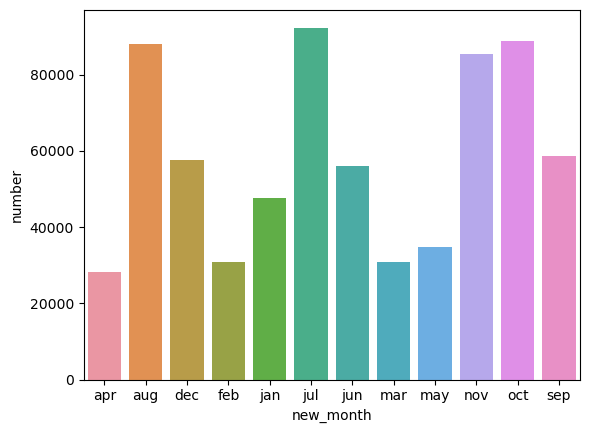

In [92]:
sns.barplot(data=data1,x="new_month",y="number")

Maximum no. of fires were reported in the month of July

3) In which year maximum no. of Forest fires were reported?

In [93]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [94]:
data2=data.groupby("year")["number"].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

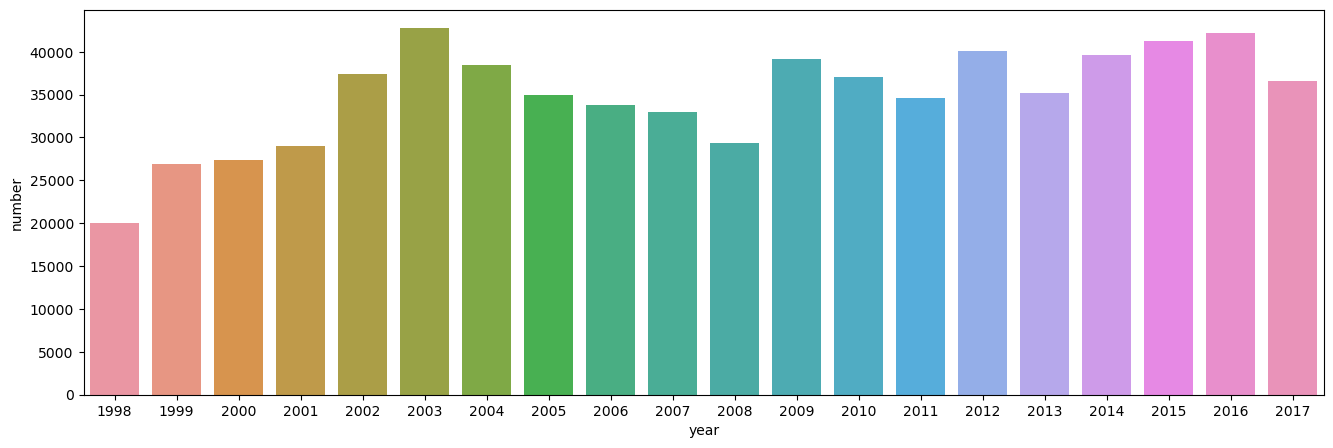

In [96]:
plt.figure(figsize=(16,5))
sns.barplot(data=data2,x="year",y="number")

4) In which state maximum no. of Forest Fires were reported?

In [97]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [98]:
data3=data.groupby("state")["number"].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


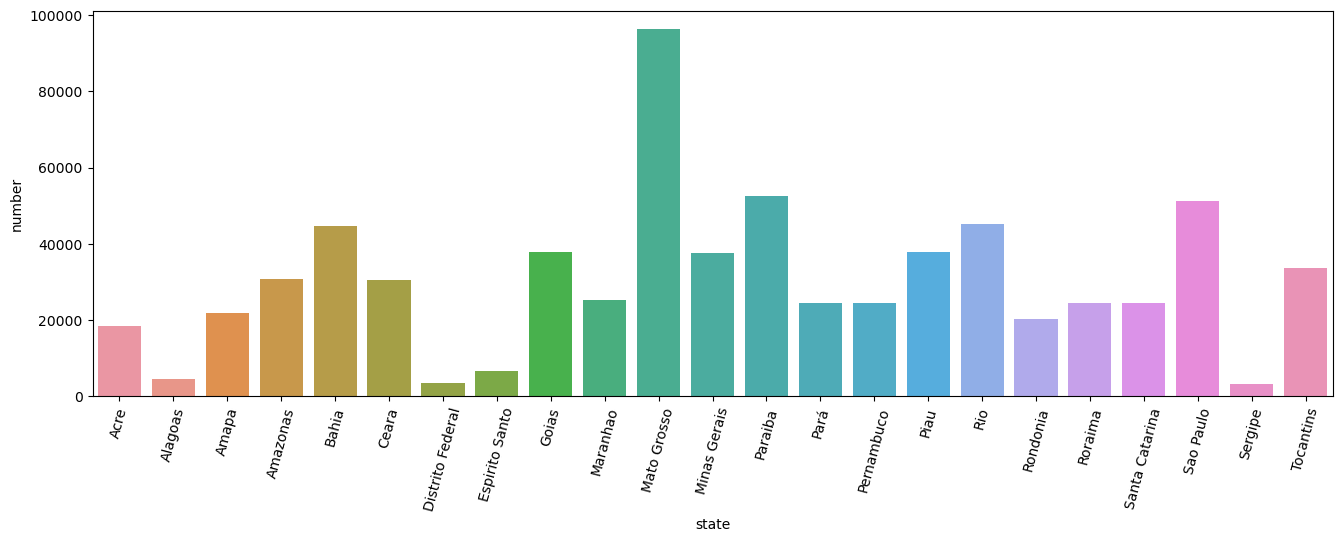

In [100]:
plt.figure(figsize=(16,5))
sns.barplot(data=data3,x="state",y="number")
plt.xticks(rotation =75)
plt.show()

5) Find the total no. of fires that were reported in Amazonas

In [101]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [102]:
data4= data[data["state"]=="Amazonas"]["number"].sum()
data4

30650.129

6) Display the no.of fires reported in Amazonas(year wise)

In [104]:
data["year"]

0       1998
1       1999
2       2000
3       2001
4       2002
        ... 
6449    2012
6450    2013
6451    2014
6452    2015
6453    2016
Name: year, Length: 6422, dtype: int64

In [106]:
data5 = data[data["state"]=="Amazonas"]

In [107]:
data6=data5.groupby("year")["number"].sum().reset_index()
data6

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

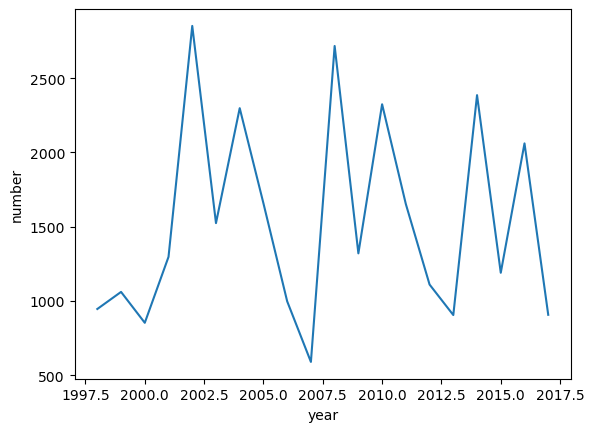

In [108]:
sns.lineplot(data=data6,x="year",y="number")

7) Display no.of fires were reported in Amazonas(day wise)

In [110]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [112]:
data7=data[data["state"]=="Amazonas"]
day=data7.groupby(data7["date"].dt.dayofweek).sum().number
day

C:\Users\sindh\AppData\Local\Temp\ipykernel_16676\3562104846.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day=data7.groupby(data7["date"].dt.dayofweek).sum().number


date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [113]:
import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

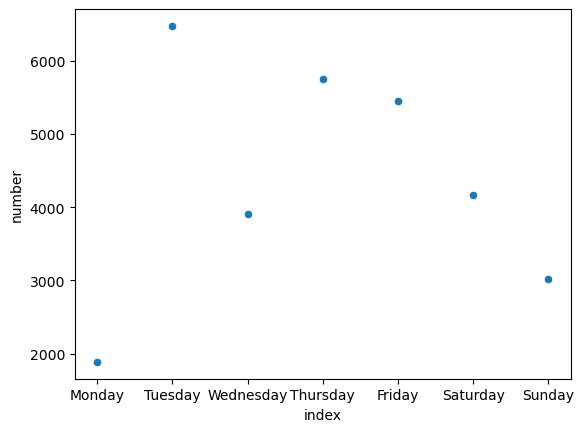

In [114]:
sns.scatterplot(data=day,x="index",y="number")

8) Find the total no. of fires reported in 2015 and visualize data based on each "month"

In [115]:
fire = data[data["year"]==2015].groupby("new_month")["number"].sum().reset_index()
fire

,new_month,number
0,apr,2573.000
1,aug,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,jul,4364.392
6,jun,3260.552
7,mar,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='new_month', ylabel='number'>

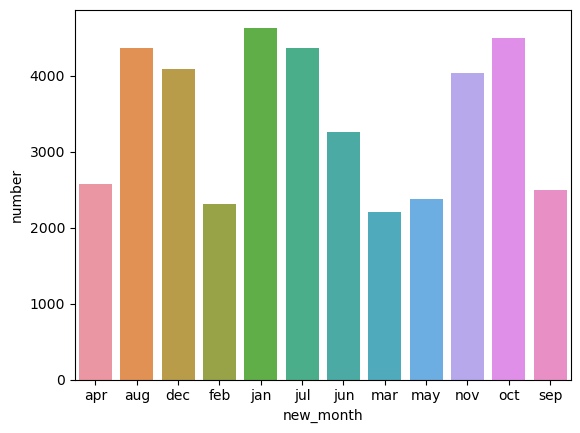

In [116]:
sns.barplot(data=fire,x="new_month",y="number")

9) Identify the average number of reported fires by state(from highest to lowest)

In [117]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [118]:
data8=data.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


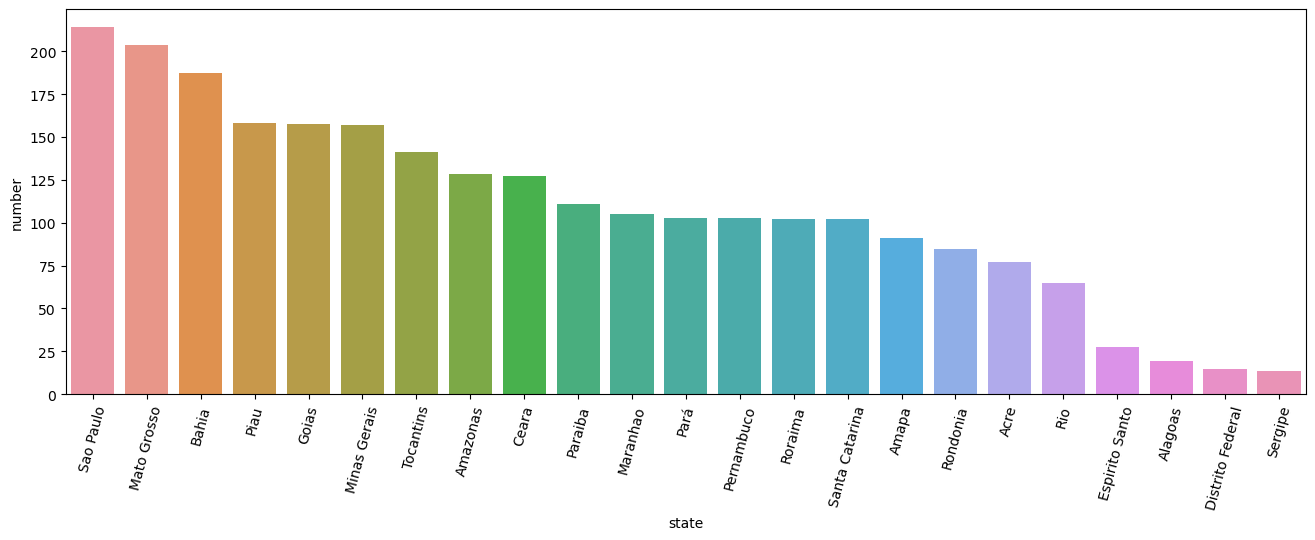

In [120]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

10) Identify the states where fires were reported during the month of December.

In [121]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [122]:
data9=data[data["new_month"]=="dec"]["state"].unique()
data9

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)